# # E. D. A.

In [1]:
import librosa
import librosa.display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ARQUIVO_SAIDA_XFUSAO = 'DATAFRAMES/Xfusao.csv'

In [3]:
Xfusao = pd.read_csv(ARQUIVO_SAIDA_XFUSAO, sep=';')
Xfusao.shape

(1364, 7)

In [4]:
Xfusao.head()

,path,dataset,arquivo,pessoa,genero,emocao,intensidade
0,/media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...,verbo,ale-f1-l1.wav,f1,f,alegria,NaN
1,/media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...,verbo,ale-f1-l2.wav,f1,f,alegria,NaN
2,/media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...,verbo,ale-f1-l3.wav,f1,f,alegria,NaN
3,/media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...,verbo,ale-f1-l4.wav,f1,f,alegria,NaN
4,/media/hbrandao/STORAGE_HDD_1TB/PPGI/VERBO/Aud...,verbo,ale-f1-l5.wav,f1,f,alegria,NaN


## Reprensentação dos dados

### Sinal

In [43]:
_p, _a = Xfusao.iloc[777][['path', 'arquivo']]

y, sr = librosa.load(_p)
y.shape

(22942,)

Text(0, 0.5, 'Amplitude')

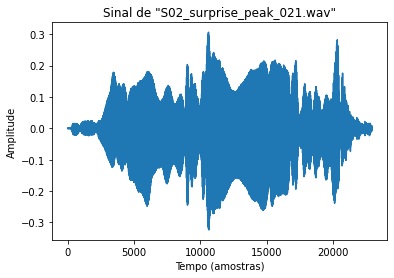

In [44]:
plt.plot(y)
plt.title(f'Sinal de "{_a}"')
plt.xlabel('Tempo (amostras)')
plt.ylabel('Amplitude')

### Frequências

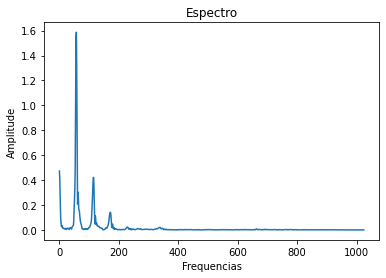

In [45]:
n_fft = 2048

ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))

plt.plot(ft);

plt.title('Espectro');
plt.xlabel('Frequencias');
plt.ylabel('Amplitude');

### Espectrograma

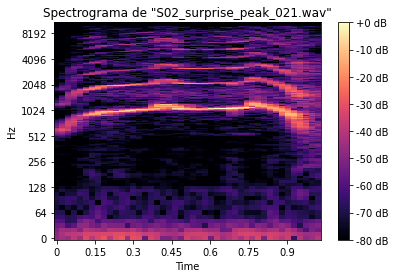

In [46]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)

librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');

plt.colorbar(format='%+2.0f dB');

plt.title(f'Spectrograma de "{_a}"');

### Espectrograma de Mel

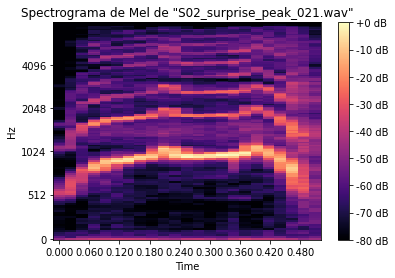

In [47]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time');

plt.colorbar(format='%+2.0f dB');

plt.title(f'Spectrograma de Mel de "{_a}"');

### MFCC

Text(0.5, 1.0, 'MFCCs de "S02_surprise_peak_021.wav"')

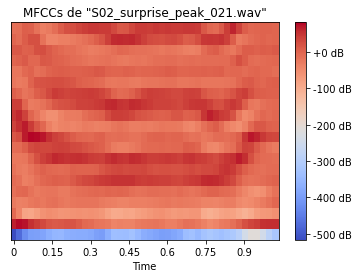

In [48]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

librosa.display.specshow(mfccs, x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.title(f'MFCCs de "{_a}"')

In [49]:
_ = [10, 12, 14, 16, 20, 24]
__ = [librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num) for num in _]
__ = list(zip(_, __))

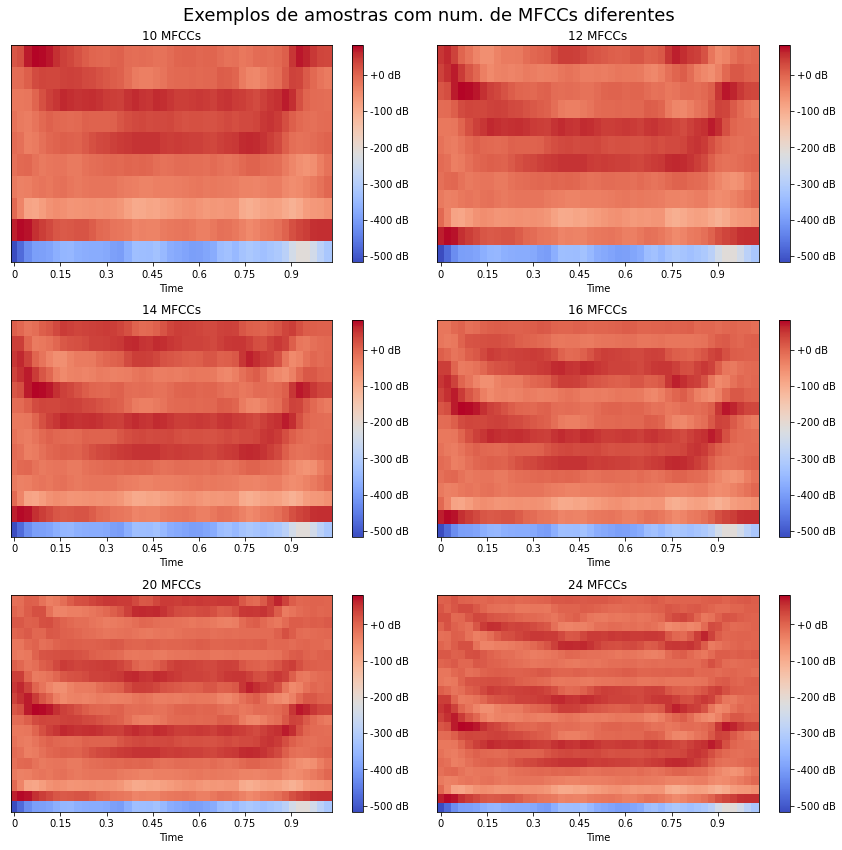

In [50]:
plt.figure(figsize=(12, 12))

plt.suptitle('Exemplos de amostras com num. de MFCCs diferentes', fontsize=18)

row, col, idx = 3, 2, 1

for n,m in __:
    plt.subplot(row, col, idx)
    plt.title(f'{n} MFCCs')
    librosa.display.specshow(m, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    idx += 1

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.tight_layout()
plt.show()

In [51]:
def calcula_mfcc(path_arquivo: str, n_mfcc: int = 24):
    """
    Heurística para escolher 24 MFCCs
    """
    y, sr = librosa.load(path_arquivo)
    return librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

In [52]:
%%time

MFCCS_ARQUIVOS = [calcula_mfcc(_) for _ in Xfusao['path'].values]

CPU times: user 3min 12s, sys: 6min 47s, total: 10min
Wall time: 53.3 s


In [58]:
[(_[0], _[-1].shape) for _ in enumerate(MFCCS_ARQUIVOS)]

[(0, (24, 106)),
 (1, (24, 169)),
 (2, (24, 151)),
 (3, (24, 159)),
 (4, (24, 101)),
 (5, (24, 95)),
 (6, (24, 112)),
 (7, (24, 86)),
 (8, (24, 145)),
 (9, (24, 184)),
 (10, (24, 79)),
 (11, (24, 96)),
 (12, (24, 92)),
 (13, (24, 100)),
 (14, (24, 129)),
 (15, (24, 193)),
 (16, (24, 176)),
 (17, (24, 199)),
 (18, (24, 135)),
 (19, (24, 114)),
 (20, (24, 135)),
 (21, (24, 94)),
 (22, (24, 150)),
 (23, (24, 224)),
 (24, (24, 110)),
 (25, (24, 106)),
 (26, (24, 101)),
 (27, (24, 104)),
 (28, (24, 88)),
 (29, (24, 146)),
 (30, (24, 122)),
 (31, (24, 138)),
 (32, (24, 96)),
 (33, (24, 80)),
 (34, (24, 96)),
 (35, (24, 78)),
 (36, (24, 123)),
 (37, (24, 160)),
 (38, (24, 73)),
 (39, (24, 85)),
 (40, (24, 70)),
 (41, (24, 97)),
 (42, (24, 137)),
 (43, (24, 165)),
 (44, (24, 158)),
 (45, (24, 160)),
 (46, (24, 125)),
 (47, (24, 107)),
 (48, (24, 135)),
 (49, (24, 99)),
 (50, (24, 143)),
 (51, (24, 236)),
 (52, (24, 79)),
 (53, (24, 102)),
 (54, (24, 97)),
 (55, (24, 107)),
 (56, (24, 105)),
 (

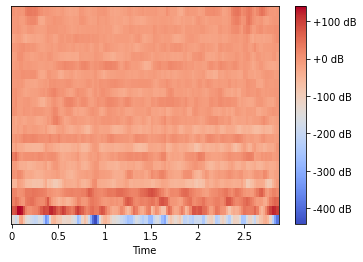

In [65]:
librosa.display.specshow(MFCCS_ARQUIVOS[369], x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

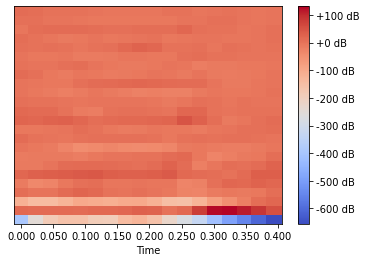

In [64]:
librosa.display.specshow(MFCCS_ARQUIVOS[694], x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()